In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import sys, os
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('image', cmap='Blues')
from slmsuite.holography.algorithms import Hologram
from slmsuite.hardware.slms.slm import SLM
from slmsuite.hardware.cameras.camera import Camera
from slmsuite.hardware.cameraslms import FourierSLM
from slmsuite.holography.algorithms import SpotHologram
import copy
from IPython.display import Image
import imageio
import cv2
import numpy as np
import ctypes
from ctypes import *
from scipy import misc
from time import sleep
import csv
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from instrumental.drivers.cameras import uc480

def plot(title=""):
    _, axs = plt.subplots(1, 3, figsize=(16,4))

    if slm.phase_correction is None:
        correction = 0 * slm.phase
    else:
        correction = np.mod(slm.phase_correction, 2*np.pi)

    axs[0].set_title("Phase Correction")
    axs[0].imshow(
        correction,
        vmin=0,
        vmax=2*np.pi,
        interpolation="none",
        cmap="twilight"
    )

    axs[1].set_title("Displayed Phase")
    axs[1].imshow(
        np.mod(slm.phase, 2*np.pi),
        vmin=0,
        vmax=2*np.pi,
        interpolation="none",
        cmap="twilight"
    )

    axs[2].set_title("Camera Result")
    axs[2].imshow(cam.get_image())

    plt.suptitle(title)

    plt.show()

cupy not installed. Using numpy.


In [67]:
# for folders one level below the heirarchy
import sys
import os
current_dir = os.getcwd()
parent_dir = os.path.abspath(os.path.join(current_dir, os.pardir))
sys.path.append(parent_dir)
###########################################
from slmfunctions.dependencies import *
from slmfunctions.settings import *
from slmfunctions.simulation import *
from slmfunctions.imageprocessing import *
from slmfunctions.phaseretrieval import *

## More dependencies
import scipy.fft as spfft
from scipy.ndimage import gaussian_filter1d as sp_gaussian_filter1d
from scipy.ndimage import affine_transform as sp_affine_transform
from scipy.ndimage import gaussian_filter as sp_gaussian_filter
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from itertools import product

cupyon=True

try:
    import cupy as cp
    import cupyx.scipy.fft as cpfft
    import cupyx.scipy.ndimage
    from cupyx.scipy.ndimage import gaussian_filter1d as cp_gaussian_filter1d
    from cupyx.scipy.ndimage import gaussian_filter as cp_gaussian_filter
    from cupyx.scipy.ndimage import affine_transform as cp_affine_transform
except ImportError:
    cp = np
    cpfft = spfft
    cp_gaussian_filter1d = sp_gaussian_filter1d
    cp_gaussian_filter = sp_gaussian_filter
    cp_affine_transform = sp_affine_transform
    cupyon = False
    print("cupy not installed. Using numpy.")

# GLOBAL VARIABLES
numpixels = 1300
slmwidth = 1200
slmheight = 1920

ModuleNotFoundError: No module named 'tifffile'

In [2]:
from slmsuite.hardware.slms.meadowlark import Meadowlark
slm = Meadowlark(sdk_path="C:\\Program Files\\Meadowlark Optics\\Blink 1920 HDMI", lut_path=r'C:\cleen\nsong\2-Research\UAC Research\Github\Ultracold-Research\GWS-Summer2024\initslm\globalcalibrationat650_june2024.lut')
slm.load_vendor_phase_correction(
    file_path=r'C:\cleen\nsong\2-Research\UAC Research\Github\Ultracold-Research\MeadowLark SLM\SLM\slm6287_at785_WFC.jpg',  # Update this path to load your calibration
)

Validating DPI awareness...success
Constructing Blink SDK...success
Loading LUT file...

array([[4.56512682, 4.56512682, 4.56512682, ..., 5.25235022, 5.25235022,
        5.25235022],
       [4.56512682, 4.56512682, 4.56512682, ..., 5.25235022, 5.25235022,
        5.25235022],
       [4.56512682, 4.56512682, 4.56512682, ..., 5.25235022, 5.25235022,
        5.25235022],
       ...,
       [5.25235022, 5.25235022, 5.25235022, ..., 4.58967052, 4.58967052,
        4.58967052],
       [5.25235022, 5.25235022, 5.25235022, ..., 4.58967052, 4.58967052,
        4.58967052],
       [5.25235022, 5.25235022, 5.25235022, ..., 4.58967052, 4.58967052,
        4.58967052]])

In [3]:
from slmsuite.hardware.cameras.thorlabs import ThorCam
ThorCam.info(verbose=True)

ThorCam serials:
"19001"


['19001']

In [4]:
cam = ThorCam()

TLCameraSDK initializing... success
Looking for cameras... success
ThorCam sn "19001" initializing... success


In [5]:
fs = FourierSLM(cam, slm)


100%|██████████| 50/50 [02:25<00:00,  2.91s/it]


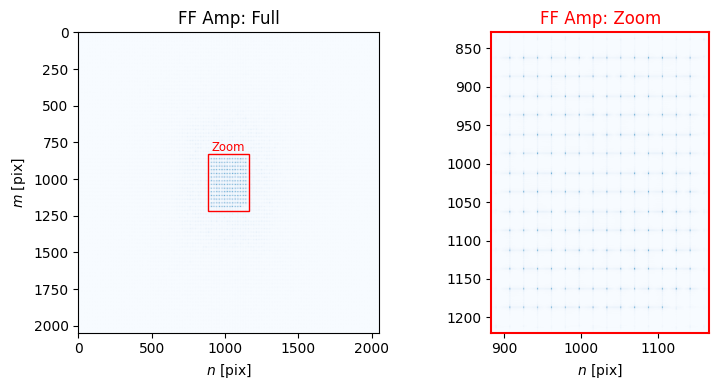

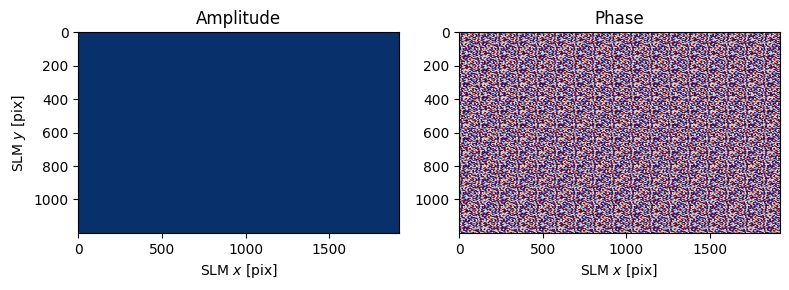

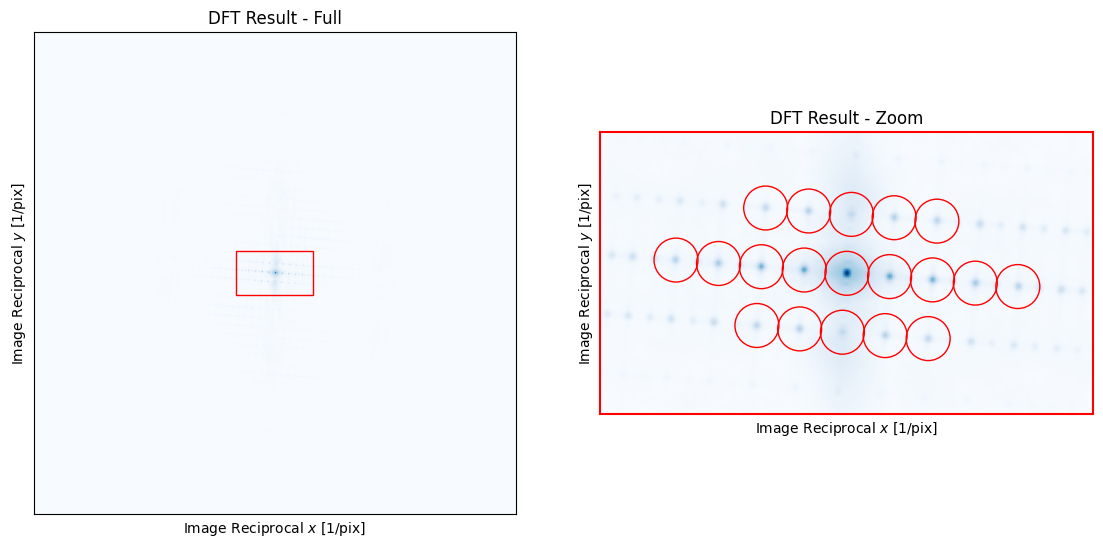

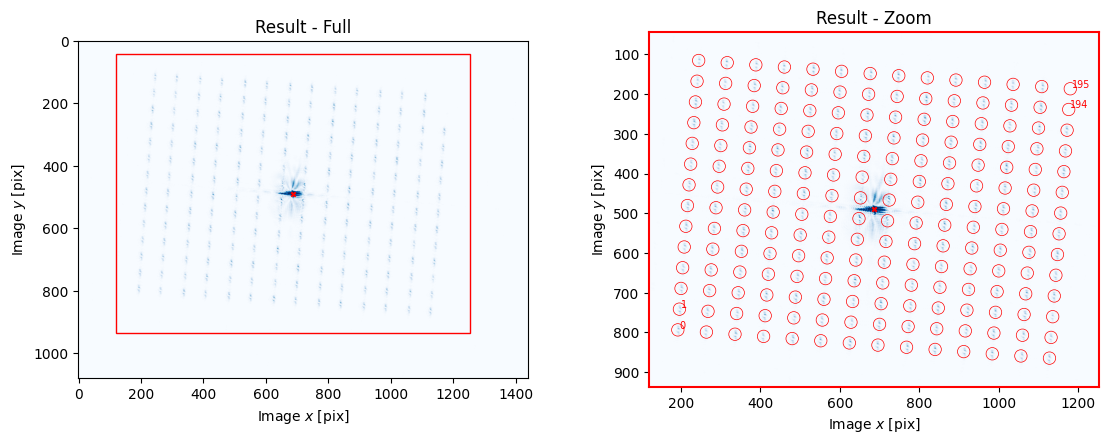

{'M': array([[  3671.62177934,  47179.83299434],
        [-47495.38206097,   3586.69430462]]),
 'b': array([[686.51091498],
        [490.16908806]]),
 'a': array([[0.],
        [0.]])}

In [6]:
## Now create the wavefront calibration file
# Step 1: Calibrate the Camera Fourier domain
cam.set_exposure(.001)

fs.fourier_calibrate(
    array_shape=[14, 14],           # Size of the calibration grid (Nx, Ny) [knm]
    array_pitch=[18, 25],           # Pitch of the calibration grid (x, y) [knm]
    plot=True,
)

0.059984 163.4
0.119968 317.0
0.19376535015772872 521.4


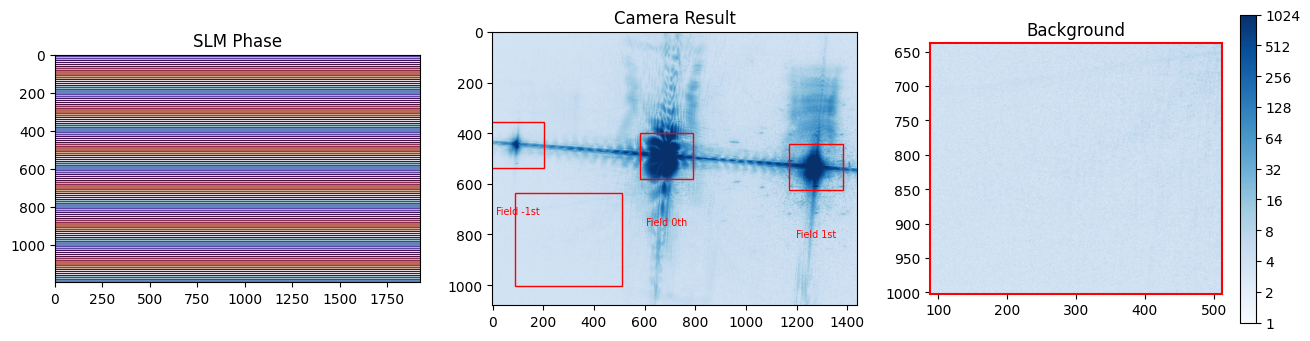

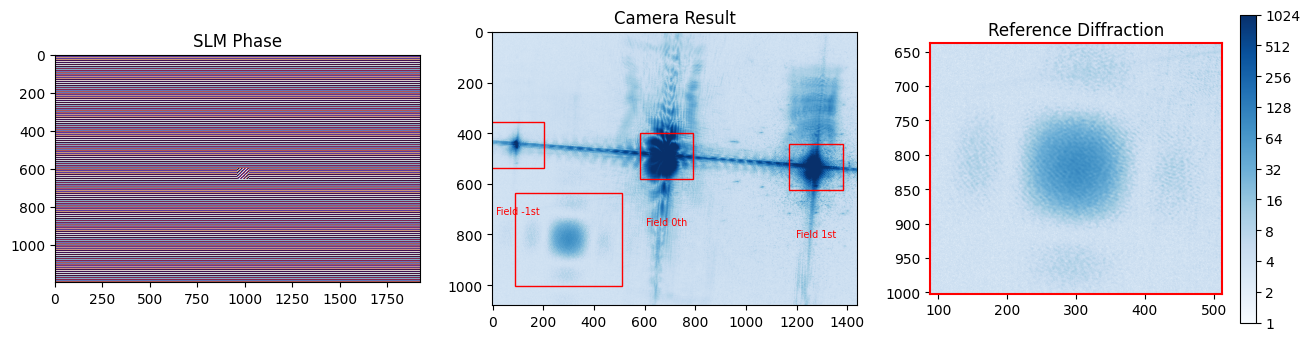

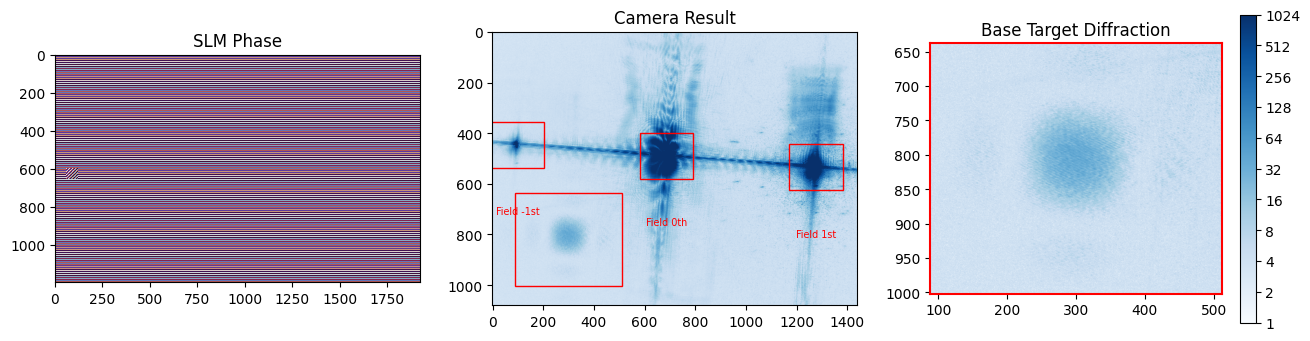

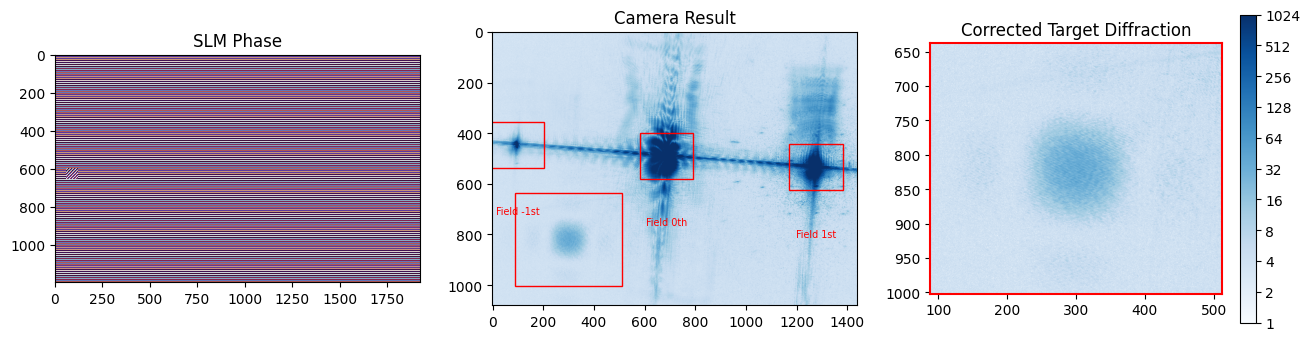

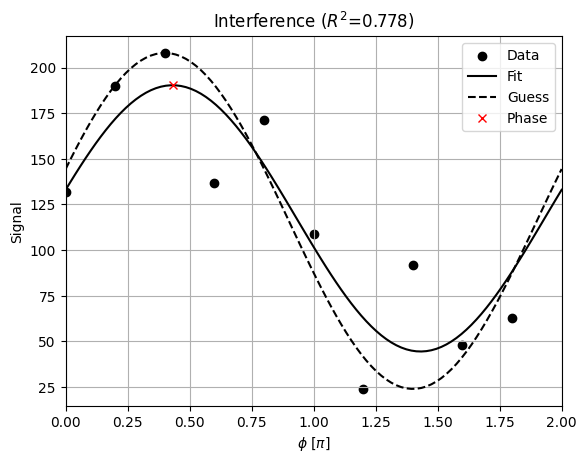

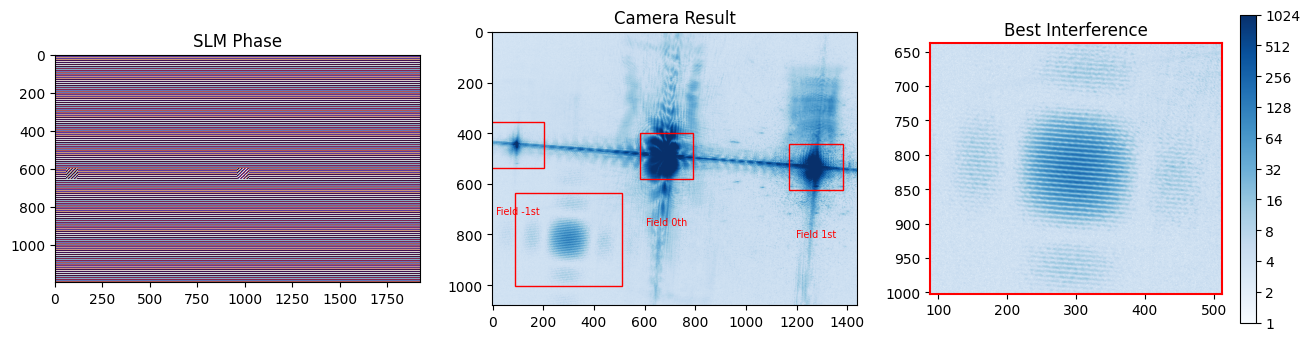

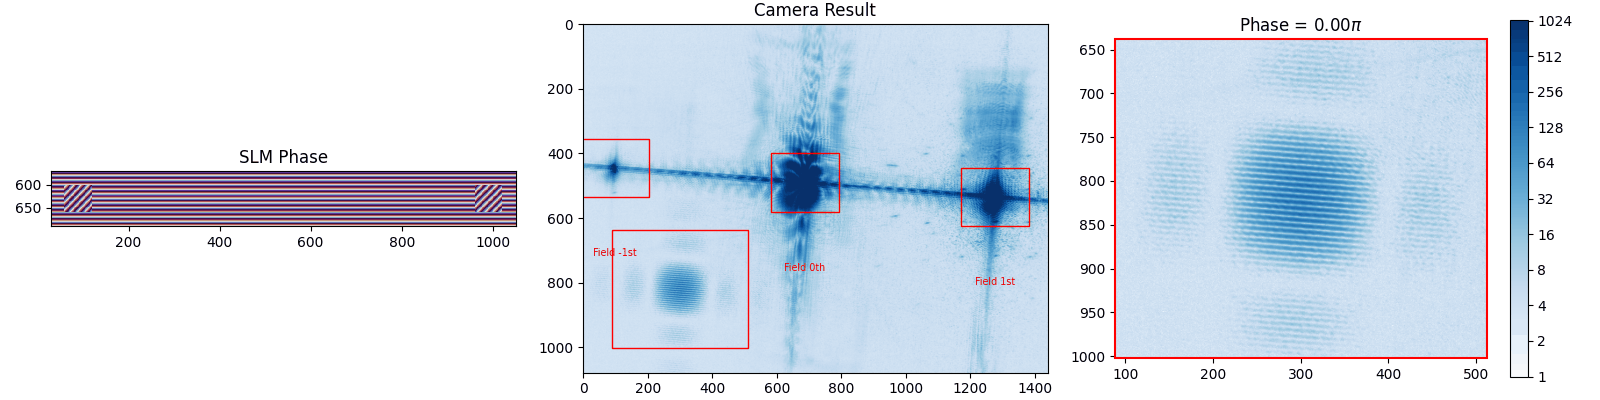

In [7]:
# Step 2: Test a single superpixel
cam.set_exposure(.03)

movie = fs.wavefront_calibrate(
    interference_point=(300, 820),
    field_point=(0, 0.1),
    field_point_units="freq",
    superpixel_size=60,
    test_superpixel=(1, 10),
    autoexposure = True,
    plot=3
    )

# Generate a phase .gif
from IPython.display import Image
import imageio

imageio.mimsave('wavefront.gif', movie)
Image(filename="wavefront.gif")

In [8]:
fs.wavefront_calibrate(
    interference_point=(300, 820),
    field_point=(0, 0.1),
    field_point_units="freq",
    superpixel_size=60,
    autoexposure = True
)

fs.save_wavefront_calibration()


0.077494 208.8
0.154988 420.2
0.18884782484531173 520.8


'c:\\cleen\\nsong\\2-Research\\UAC Research\\Github\\Ultracold-Research\\GWS-Summer2024\\initslm\\19001-Meadowlark-wavefront-calibration_00001.h5'

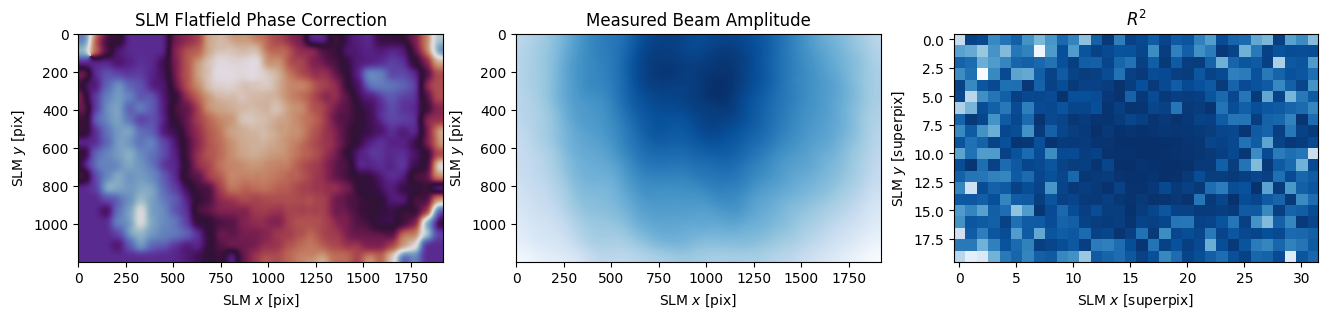

{'phase_correction': array([[1.47709057, 1.47703068, 1.47685   , ..., 0.54889522, 0.54914115,
         0.54922291],
        [1.4770651 , 1.47700521, 1.47682451, ..., 0.54892846, 0.54917445,
         0.54925623],
        [1.47698832, 1.47692841, 1.47674767, ..., 0.54902871, 0.54927487,
         0.5493567 ],
        ...,
        [2.35619826, 2.35619826, 2.35619826, ..., 2.35619826, 2.35619826,
         2.35619826],
        [2.35619826, 2.35619826, 2.35619826, ..., 2.35619826, 2.35619826,
         2.35619826],
        [2.35619826, 2.35619826, 2.35619826, ..., 2.35619826, 2.35619826,
         2.35619826]]),
 'measured_amplitude': array([[0.63453233, 0.6345363 , 0.6345485 , ..., 0.6327875 , 0.63276154,
         0.6327529 ],
        [0.6345336 , 0.6345375 , 0.6345496 , ..., 0.63279146, 0.6327655 ,
         0.63275695],
        [0.6345371 , 0.6345412 , 0.63455313, ..., 0.6328033 , 0.6327774 ,
         0.63276875],
        ...,
        [0.45648578, 0.4564896 , 0.45650077, ..., 0.43802008, 0.43

In [9]:
fs.process_wavefront_calibration(r2_threshold=.9, smooth=True, plot=True)


In [10]:
slm.phase_correction

array([[1.47709057, 1.47703068, 1.47685   , ..., 0.54889522, 0.54914115,
        0.54922291],
       [1.4770651 , 1.47700521, 1.47682451, ..., 0.54892846, 0.54917445,
        0.54925623],
       [1.47698832, 1.47692841, 1.47674767, ..., 0.54902871, 0.54927487,
        0.5493567 ],
       ...,
       [2.35619826, 2.35619826, 2.35619826, ..., 2.35619826, 2.35619826,
        2.35619826],
       [2.35619826, 2.35619826, 2.35619826, ..., 2.35619826, 2.35619826,
        2.35619826],
       [2.35619826, 2.35619826, 2.35619826, ..., 2.35619826, 2.35619826,
        2.35619826]])

In [11]:
# Convert to image files, and store!
import os
def discretize_phase(phase):
    phase=np.around((phase)*255/(2*np.pi), decimals=0 )
    return(phase)

savephase = discretize_phase(slm.phase_correction)


#####################################################3

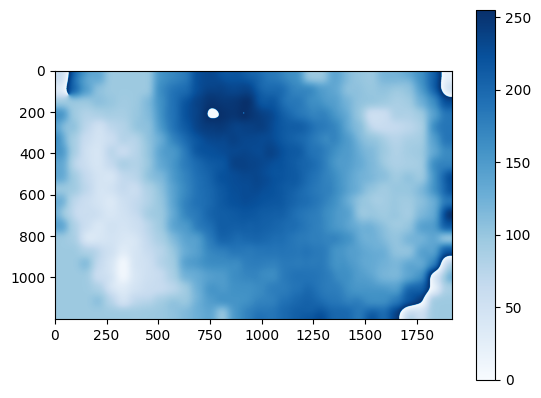

In [12]:
plt.imshow(savephase)
plt.colorbar()

In [15]:
from PIL import Image

save_dir = r'C:\cleen\nsong\2-Research\UAC Research\Github\Ultracold-Research\GWS-Summer2024\initslm' # For laptop
os.makedirs(save_dir, exist_ok=True)  # Create the directory if it doesn't exist
wavefrontphase_path = os.path.join(save_dir, f"{'wavefrontcorrectionV1626'}.bmp")
wavefrontphase = (Image.fromarray(savephase).convert('RGB'))
wavefrontphase.save(wavefrontphase_path, "BMP")
